

---


# **Modelling**


---

We will train the following models to determine which model is best suited for our problematic.

**Regression:**
*   Linear Regression
*   XGBoost
*   Decision Tree
*   ElasticNet

**Classification:**
*   Logistic Regression
*   XGBoost
*   Decision Tree
*   KNN






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import libraries**

In [ ]:
import os
default_n_threads = 8
os.environ['OPENBLAS_NUM_THREADS'] = f"{default_n_threads}"
os.environ['MKL_NUM_THREADS'] = f"{default_n_threads}"
os.environ['OMP_NUM_THREADS'] = f"{default_n_threads}"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, f1_score, accuracy_score, mean_squared_error, r2_score, confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from xgboost import XGBClassifier, plot_importance, XGBRegressor
from sklearn import neighbors

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading data
print("Reading the data is started!")
df = pd.read_csv("data_preprocessed.csv",index_col=0)
print("df length (Should be 3496097):",len(df))

# **Encoding Target**

In [ ]:
# Change the name of target column from "Ewltp (g/km)" to target
df = df.rename(columns={"Ewltp (g/km)":"target"})

# Encoding Target

# Target for 7-class classification
bin = [0, 120, 140, 155, 170, 190, 225, df["target"].max()]
df["target_clf"] = pd.cut(df["target"], bin)
# 'A' = 0,'B'=1,'C'=2, 'D'=3, 'E'=4, 'F'=5, 'G'=6
LE = LabelEncoder()
df["target_clf"] = LE.fit_transform(df["target_clf"])

print("Counts for 7 classes: ")
print(df["target_clf"].value_counts())

Counts for 7 classes: 
target_clf
1    1214250
0    1212500
2     518359
3     177188
4     156811
5     143041
6      73948
Name: count, dtype: int64


# **Splitting data into train, test and validation sets**

In [ ]:
X, X_valid, y_reg, y_valid_reg, y_clf, y_valid_clf = train_test_split(df.drop(["target", "target_clf"], axis=1),
                                                                      df["target"],
                                                                      df["target_clf"],
                                                                      stratify=df["target_clf"],
                                                                      test_size=0.1,
                                                                      random_state=42)
X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(X,
                                                                                     y_reg,
                                                                                     y_clf,
                                                                                     stratify=y_clf,
                                                                                     test_size=0.2,
                                                                                     random_state=42)

# **Data normalization**

In [ ]:
# Scaling data (only numerical features)
numerical_features = ["m (kg)","ep (KW)","Erwltp (g/km)","Fuel consumption"]
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
X_valid[numerical_features] = scaler.transform(X_valid[numerical_features])

# **Models for Regression**

In [ ]:
# Initializing DataFrame for comparing results
metrics_compare = []

# **Linear Regression**

In [ ]:
# Multivar Regression
model_name = "LinearRegression"

lr = LinearRegression()
lr.fit(X_train, y_train_reg)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Compute R2
score_train = lr.score(X_train,y_train_reg)
score_test = lr.score(X_test,y_test_reg)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_reg, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_test_pred))

In [ ]:
# Adding scores
metrics_compare.append([model_name,"Train","R^2",round(score_train,4)])
metrics_compare.append([model_name,"Test","R^2",round(score_test,4)])
metrics_compare.append([model_name,"Train","RMSE",round(train_rmse,4)])
metrics_compare.append([model_name,"Test","RMSE",round(test_rmse,4)])

# **Elastic Net**



Default values:
*   alpha=1.0
*   l1_ratio=0.5
*   fit_intercept=True
*   precompute=False
*   max_iter=1000
*   copy_X=True
*   tol=0.0001
*   warm_start=False
*   positive=False
*   random_state=None
*   selection='cyclic'

In [ ]:
# Elastic Net
model_name = "ElasticNet"

enReg = ElasticNet()
enReg.fit(X_train,y_train_reg)

# Predictions
y_train_pred = enReg.predict(X_train)
y_test_pred = enReg.predict(X_test)

# Compute R2
score_train = enReg.score(X_train,y_train_reg)
score_test = enReg.score(X_test,y_test_reg)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_reg, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_test_pred))

In [ ]:
# Adding scores
metrics_compare.append([model_name,"Train","R^2",round(score_train,4)])
metrics_compare.append([model_name,"Test","R^2",round(score_test,4)])
metrics_compare.append([model_name,"Train","RMSE",round(train_rmse,4)])
metrics_compare.append([model_name,"Test","RMSE",round(test_rmse,4)])

# **Decision Tree Regressor**

In [ ]:
# DecisionTreeRegressor
model_name = "DecisionTreeRegressor"

dtReg = DecisionTreeRegressor(max_depth = 5)
dtReg.fit(X_train, y_train_reg)

# Predictions
y_train_pred = dtReg.predict(X_train)
y_test_pred = dtReg.predict(X_test)

# Compute R2
score_train = dtReg.score(X_train,y_train_reg)
score_test = dtReg.score(X_test,y_test_reg)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_reg, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_test_pred))

In [ ]:
# Adding scores
metrics_compare.append([model_name,"Train","R^2",round(score_train,4)])
metrics_compare.append([model_name,"Test","R^2",round(score_test,4)])
metrics_compare.append([model_name,"Train","RMSE",round(train_rmse,4)])
metrics_compare.append([model_name,"Test","RMSE",round(test_rmse,4)])

# **XGBoost Regressor**

In [ ]:
# XGBRegressor
model_name = "XGBRegressor"

xgbReg = XGBRegressor(objective='reg:squarederror')
xgbReg.fit(X_train,y_train_reg)

# Predictions
y_train_pred = xgbReg.predict(X_train)
y_test_pred = xgbReg.predict(X_test)

# Compute R2
score_train = r2_score(y_train_reg,y_train_pred)
score_test = r2_score(y_test_reg,y_test_pred)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_reg, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_test_pred))

In [ ]:
# Adding scores
metrics_compare.append([model_name,"Train","R^2",round(score_train,4)])
metrics_compare.append([model_name,"Test","R^2",round(score_test,4)])
metrics_compare.append([model_name,"Train","RMSE",round(train_rmse,4)])
metrics_compare.append([model_name,"Test","RMSE",round(test_rmse,4)])

# **Models for Classification**

# **Logistic Regression**

In [ ]:
# LogisticRegression
model_name = "LogisticRegression"

lrClf = LogisticRegression(solver="sag", max_iter = 1000)
lrClf.fit(X_train,y_train_clf)

# Predictions
y_train_pred = lrClf.predict(X_train)
y_test_pred = lrClf.predict(X_test)

# Compute accuracy
score_train = lrClf.score(X_train,y_train_clf)
score_test = lrClf.score(X_test,y_test_clf)

# Compute F1
train_f1=f1_score(y_train_clf,y_train_pred,average="weighted")
test_f1=f1_score(y_test_clf,y_test_pred,average="weighted")

In [ ]:
# Adding scores
metrics_compare.append([model_name,"Train","Accuracy",round(score_train,4)])
metrics_compare.append([model_name,"Test","Accuracy",round(score_test,4)])
metrics_compare.append([model_name,"Train","F1",round(train_f1,4)])
metrics_compare.append([model_name,"Test","F1",round(test_f1,4)])

# **K-Nearest Neighbors (KNN)**

In [ ]:
# KNeighborsClassifier
model_name = "KNeighborsClassifier"

knn = neighbors.KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(X_train, y_train_clf)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Compute accuracy
score_train = knn.score(X_train,y_train_clf)
score_test = knn.score(X_test,y_test_clf)

# Compute F1
train_f1=f1_score(y_train_clf,y_train_pred,average="weighted")
test_f1=f1_score(y_test_clf,y_test_pred,average="weighted")

In [ ]:
# Adding scores
metrics_compare.append([model_name,"Train","Accuracy",round(score_train,4)])
metrics_compare.append([model_name,"Test","Accuracy",round(score_test,4)])
metrics_compare.append([model_name,"Train","F1",round(train_f1,4)])
metrics_compare.append([model_name,"Test","F1",round(test_f1,4)])

# **Decision Tree Classifier**

In [ ]:
# DecisionTreeClassifier
model_name = "DecisionTreeClassifier"

dt_clf = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=123)
dt_clf.fit(X_train, y_train_clf)

# Predictions
y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

# Compute accuracy
score_train = dt_clf.score(X_train,y_train_clf)
score_test = dt_clf.score(X_test,y_test_clf)

# Compute F1
train_f1=f1_score(y_train_clf,y_train_pred,average="weighted")
test_f1=f1_score(y_test_clf,y_test_pred,average="weighted")

In [ ]:
# Adding scores
metrics_compare.append([model_name,"Train","Accuracy",round(score_train,4)])
metrics_compare.append([model_name,"Test","Accuracy",round(score_test,4)])
metrics_compare.append([model_name,"Train","F1",round(train_f1,4)])
metrics_compare.append([model_name,"Test","F1",round(test_f1,4)])

# **XGBoost Classifier**

Default values:

*   max_depth=3
*   learning_rate=0.1
*   n_estimators=100
*   silent=True
*   booster='gbtree'
*   n_jobs=1
*   nthread=None
*   gamma=0
*   min_child_weight=1
*   max_delta_step=0
*   subsample=1
*   colsample_bytree=1
*   colsample_bylevel=1
*   reg_alpha=0
*   reg_lambda=1
*   scale_pos_weight=1
*   base_score=0.5
*   random_state=0
*   seed=None
*   missing=None





In [ ]:
# XGBClassifier
model_name = "XGBClassifier"

xgbClf = XGBClassifier(objective='multi:softmax', num_class=7)
xgbClf.fit(X_train,y_train_clf)

# Predictions
y_train_pred = xgbClf.predict(X_train)
y_test_pred = xgbClf.predict(X_test)

# Compute accuracy
score_train = accuracy_score(y_train_clf,y_train_pred)
score_test = accuracy_score(y_test_clf,y_test_pred)

# Compute F1
train_f1=f1_score(y_train_clf,y_train_pred,average="weighted")
test_f1=f1_score(y_test_clf,y_test_pred,average="weighted")

In [ ]:
# Adding scores
metrics_compare.append([model_name,"Train","Accuracy",round(score_train,4)])
metrics_compare.append([model_name,"Test","Accuracy",round(score_test,4)])
metrics_compare.append([model_name,"Train","F1",round(train_f1,4)])
metrics_compare.append([model_name,"Test","F1",round(test_f1,4)])

# **Model Optimization**

The result of the model comparison shows, that the XGBoost for Regression and also for Classification gave us the smalles error and best accuracy respectively.

In this step we will try to optimize these models.

# **XGBoost Regressor**

In [ ]:
# XGBRegressor optimization
model_name = "XGBRegressor optimized"

params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}

xgbReg = XGBRegressor(objective='reg:squarederror')

# Perform GridSearch
gridcv = GridSearchCV(estimator=xgbReg, param_grid=params, cv=3, scoring='neg_mean_squared_error')
gridcv.fit(X_train, y_train_reg)

# Get the best parameters and best estimator
best_params = gridcv.best_params_
best_estimator = gridcv.best_estimator_

# Predict using the best estimator
y_train_reg_pred = best_estimator.predict(X_train)
y_test_reg_pred = best_estimator.predict(X_test)

# Compute R2
score_train = r2_score(y_train_reg,y_train_reg_pred)
score_test = r2_score(y_test_reg,y_test_reg_pred)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_reg, y_train_reg_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_test_reg_pred))

print("\n")
print("Results for XGBRegressor")
print("-------------------------")
print("Best parameters:", best_params)

In [ ]:
# Adding scores
metrics_compare.append([model_name,"Train","R^2",round(score_train,4)])
metrics_compare.append([model_name,"Test","R^2",round(score_test,4)])
metrics_compare.append([model_name,"Train","RMSE",round(train_rmse,4)])
metrics_compare.append([model_name,"Test","RMSE",round(test_rmse,4)])

In [ ]:
# Feature importance
featimp_score = best_estimator.feature_importances_
col_names = X_train.columns
df_featimp = pd.DataFrame(featimp_score,index=col_names[:len(featimp_score)],columns=["importance"])
df_featimp = df_featimp.sort_values(by="importance")
df_featimp_10 = df_featimp.tail(10)
df_featimp_10

print("Feature importance")
print(df_featimp_10)
df_featimp_10.to_excel("xgbReg_Feature_importance.xlsx")

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.barh(range(len(df_featimp_10)), df_featimp_10['importance'], tick_label=df_featimp_10.index)
ax.set_xlabel('Feature Importance Percentage')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
fig.tight_layout()
fig.savefig("xgbReg_Feature_importance.pdf")
plt.show();


# **XGBoost Classifier**

In [ ]:
# XGBClassifier optimization
model_name = "XGBClassifier optimized"

params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}

xgbClf = XGBClassifier(objective='multi:softmax')

# Perform GridSearch
gridcv = GridSearchCV(estimator=xgbClf, param_grid=params, cv=3, scoring='accuracy')
gridcv.fit(X_train, y_train_clf)

# Get the best parameters and best estimator
best_params = gridcv.best_params_
best_estimator = gridcv.best_estimator_

# Predict using the best estimator on validation set
y_train_clf_pred = best_estimator.predict(X_train)
y_test_clf_pred = best_estimator.predict(X_test)

# Compute accuracy
score_train = accuracy_score(y_train_clf, y_train_clf_pred)
score_test = accuracy_score(y_test_clf, y_test_clf_pred)

# Compute f1
train_f1=f1_score(y_train_clf,y_train_clf_pred,average="weighted")
test_f1=f1_score(y_test_clf,y_test_clf_pred,average="weighted")

print("\n")
print("Results for XGBClassifier")
print("-------------------------")
print("Best parameters:", best_params)

print("Classification report (Training)")
print(classification_report_imbalanced(y_train_clf, y_train_clf_pred))
print(classification_report(y_train_clf, y_train_clf_pred))

print("Classification report (Test)")
print(classification_report_imbalanced(y_test_clf, y_test_clf_pred))
print(classification_report(y_test_clf, y_test_clf_pred))

In [ ]:
# Adding scores
metrics_compare.append([model_name,"Train","Accuracy",round(score_train,4)])
metrics_compare.append([model_name,"Test","Accuracy",round(score_test,4)])
metrics_compare.append([model_name,"Train","F1",round(train_f1,4)])
metrics_compare.append([model_name,"Test","F1",round(test_f1,4)])

In [ ]:
# Feature importance
featimp_score = best_estimator.feature_importances_
col_names = X_train.columns
df_featimp = pd.DataFrame(featimp_score,index=col_names[:len(featimp_score)],columns=["importance"])
df_featimp = df_featimp.sort_values(by="importance")
df_featimp_10 = df_featimp.tail(10)

print("Feature importance")
print(df_featimp_10)
df_featimp_10.to_excel("xgbClf_Feature_importance.xlsx")

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.barh(range(len(df_featimp_10)), df_featimp_10['importance'], tick_label=df_featimp_10.index)
ax.set_xlabel('Feature Importance Percentage')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
fig.tight_layout()
fig.savefig("xgbClf_Feature_importance.pdf")
plt.show();


# **Neural Networks**

In the following steps we will train a neural network for the same problematic as before.

# **Import libraries**

In [ ]:
#for modelling NN
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

#for dynamically changes during the training
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#for optimization with GridSearchCV
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor

#for optimizer definitions with individual learning-rates( NN regression could have often problems with exploding-gradients )
from tensorflow import keras

# **Preprocessing**

In [ ]:
# length of Input- and Output-Layer
input_len = len(X_train.columns)
output_len =  len(y_train_clf.unique())
print('Number of features:' , input_len)
print('Number of classes:', output_len)

Number of features: 75
Number of classes: 7


In [ ]:
# definition of the Layers for Neural-Network of classification and regression
# the difference is in the Output-Layer
inputs = Input(shape = (input_len,), name = "Input")

dense1 = Dense(units = 166, activation = 'tanh', name = 'Dense_1')

dense2 = Dense(units = 332, activation = 'tanh', name = 'Dense_2')

dense3 = Dense(units = 166, activation = 'tanh', name = 'Dense_3')

dense4 = Dense(units = 166, activation = 'tanh', name = 'Dense_4')

dense5_clf = Dense(units = output_len, activation = 'softmax', name = 'Dense_5_clf')

dense5_reg = Dense(units = 1, activation = 'linear', name = 'Dense_5_reg')


In [ ]:
# definition of the call-back function
early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 5,
                               min_delta = 0.01,
                               mode = 'min',
                               verbose = 1
                              )

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                                         factor = 0.1,
                                         patience = 3,
                                         min_delta = 0.01,
                                         cooldown = 4,
                                         verbose = 1
                                        )

# **Regression**

In [ ]:
# Regression

x = dense1(inputs)

x = dense2(x)

x = dense3(x)

x = dense4(x)

outputs = dense5_reg(x)

In [ ]:
model_reg = Model(inputs = inputs, outputs = outputs)

model_reg.compile(loss = 'mse',
                  optimizer = 'adam',
                  metrics = ['mean_absolute_error'])

model_reg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 75)]              0         
                                                                 
 Dense_1 (Dense)             (None, 166)               12616     
                                                                 
 Dense_2 (Dense)             (None, 332)               55444     
                                                                 
 Dense_3 (Dense)             (None, 166)               55278     
                                                                 
 Dense_4 (Dense)             (None, 166)               27722     
                                                                 
 Dense_5_reg (Dense)         (None, 1)                 167       
                                                                 
Total params: 151227 (590.73 KB)
Trainable params: 151227 (

In [ ]:
model_history_reg = model_reg.fit(X_train,
                              y_train_reg,
                              epochs=15,
                              batch_size=512,
                              validation_data=(X_valid,y_valid_reg),
                              callbacks = [reduce_learning_rate, early_stopping])

Epoch 1/15
4917/4917 [==============================] - 83s 17ms/step - loss: 1534.8153 - mean_absolute_error: 19.6259 - val_loss: 55.6643 - val_mean_absolute_error: 1.4411 - lr: 0.0010
Epoch 2/15
4917/4917 [==============================] - 81s 16ms/step - loss: 17.0120 - mean_absolute_error: 0.9989 - val_loss: 4.1187 - val_mean_absolute_error: 0.7745 - lr: 0.0010
Epoch 3/15
4917/4917 [==============================] - 84s 17ms/step - loss: 1.7586 - mean_absolute_error: 0.7290 - val_loss: 0.9940 - val_mean_absolute_error: 0.6397 - lr: 0.0010
Epoch 4/15
4917/4917 [==============================] - 79s 16ms/step - loss: 1.0168 - mean_absolute_error: 0.6815 - val_loss: 2.5816 - val_mean_absolute_error: 1.1486 - lr: 0.0010
Epoch 5/15
4917/4917 [==============================] - 84s 17ms/step - loss: 0.9162 - mean_absolute_error: 0.6567 - val_loss: 0.8110 - val_mean_absolute_error: 0.5802 - lr: 0.0010
Epoch 6/15
4917/4917 [==============================] - 78s 16ms/step - loss: 0.8533 - me

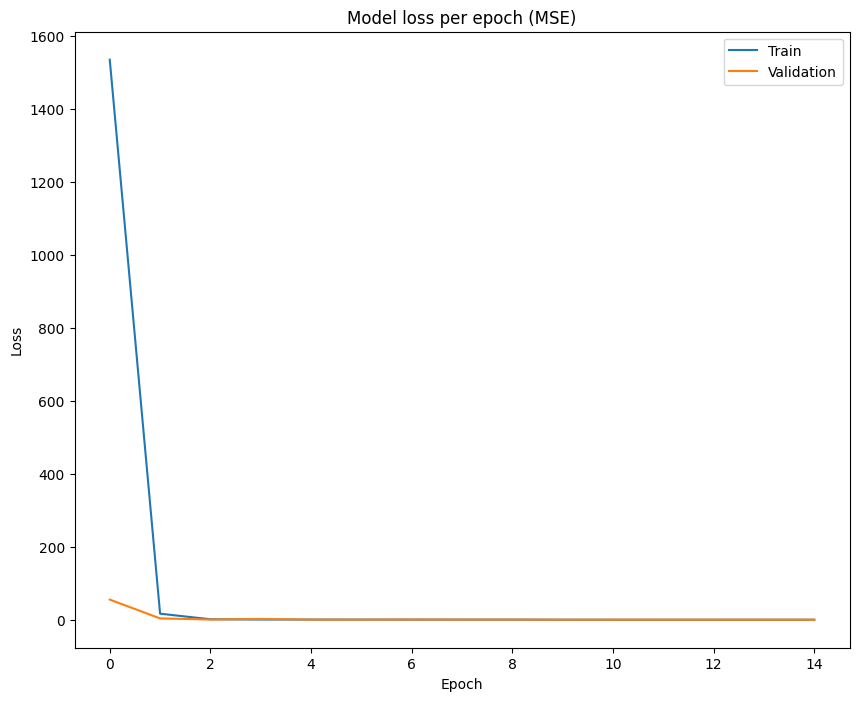

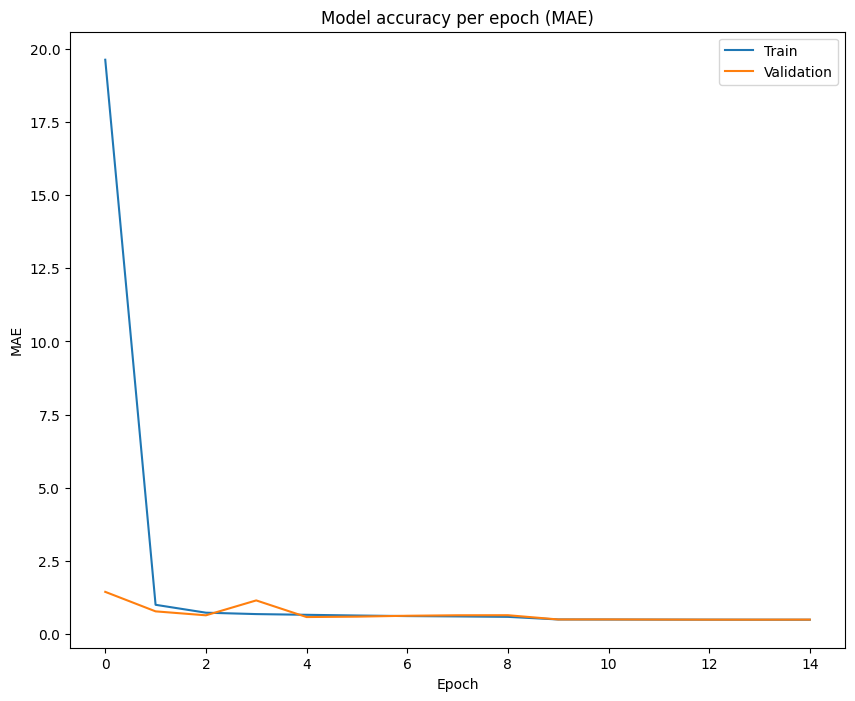

In [ ]:
train_loss = model_history_reg.history["loss"]
val_loss = model_history_reg.history["val_loss"]
train_acc = model_history_reg.history["mean_absolute_error"]
val_acc = model_history_reg.history["val_mean_absolute_error"]

# Plot 1: Loss per epoch
plt.figure(figsize=(10, 8))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss per epoch (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig("NN_Regression_loss_plot.pdf")
plt.show()

# Plot 2: Accuracy per epoch
plt.figure(figsize=(10, 8))
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy per epoch (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig("NN_Regression_accuracy_plot.pdf")
plt.show()

In [ ]:
# Predictions
y_train_reg_pred = model_reg.predict(X_train)
y_test_reg_pred = model_reg.predict(X_test)

# Compute R2
score_train=r2_score(y_train_reg,y_train_reg_pred)
score_test=r2_score(y_test_reg,y_test_reg_pred)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_reg,y_train_reg_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_reg,y_test_reg_pred))

In [ ]:
# Adding scores
model_name= "NN Regression"

metrics_compare.append([model_name,"Train","R^2",round(score_train,4)])
metrics_compare.append([model_name,"Test","R^2",round(score_test,4)])
metrics_compare.append([model_name,"Train","RMSE",round(train_rmse,4)])
metrics_compare.append([model_name,"Test","RMSE",round(test_rmse,4)])

# **Classification**

In [ ]:
# Classification

x = dense1(inputs)

x = dense2(x)

x = dense3(x)

x = dense4(x)

outputs = dense5_clf(x)

In [ ]:
model_clf = Model(inputs = inputs, outputs = outputs)

model_clf.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_clf.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 75)]              0         
                                                                 
 Dense_1 (Dense)             (None, 166)               12616     
                                                                 
 Dense_2 (Dense)             (None, 332)               55444     
                                                                 
 Dense_3 (Dense)             (None, 166)               55278     
                                                                 
 Dense_4 (Dense)             (None, 166)               27722     
                                                                 
 Dense_5_clf (Dense)         (None, 7)                 1169      
                                                                 
Total params: 152229 (594.64 KB)
Trainable params: 152229 (

In [ ]:
model_history_clf = model_clf.fit(X_train,
                              y_train_clf,
                              epochs=15,
                              batch_size=512,
                              validation_data=(X_valid,y_valid_clf),
                              callbacks = [reduce_learning_rate, early_stopping])


Epoch 1/15
4917/4917 [==============================] - 84s 17ms/step - loss: 0.0714 - accuracy: 0.9727 - val_loss: 0.0490 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 2/15
4917/4917 [==============================] - 83s 17ms/step - loss: 0.0476 - accuracy: 0.9791 - val_loss: 0.0450 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 3/15
4917/4917 [==============================] - 85s 17ms/step - loss: 0.0455 - accuracy: 0.9799 - val_loss: 0.0452 - val_accuracy: 0.9803 - lr: 0.0010
Epoch 4/15
4916/4917 [============================>.] - ETA: 0s - loss: 0.0442 - accuracy: 0.9807
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
4917/4917 [==============================] - 83s 17ms/step - loss: 0.0442 - accuracy: 0.9807 - val_loss: 0.0444 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 5/15
4917/4917 [==============================] - 80s 16ms/step - loss: 0.0377 - accuracy: 0.9831 - val_loss: 0.0374 - val_accuracy: 0.9832 - lr: 1.0000e-04
Epoch 6/15
4917/4917 [===============

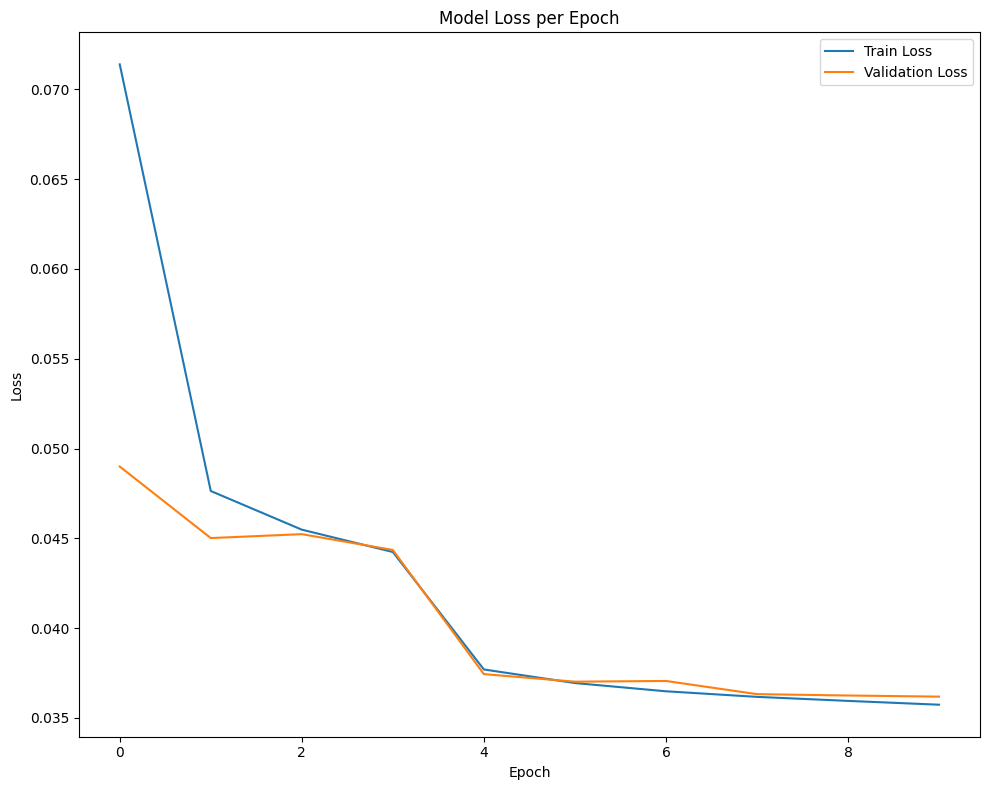

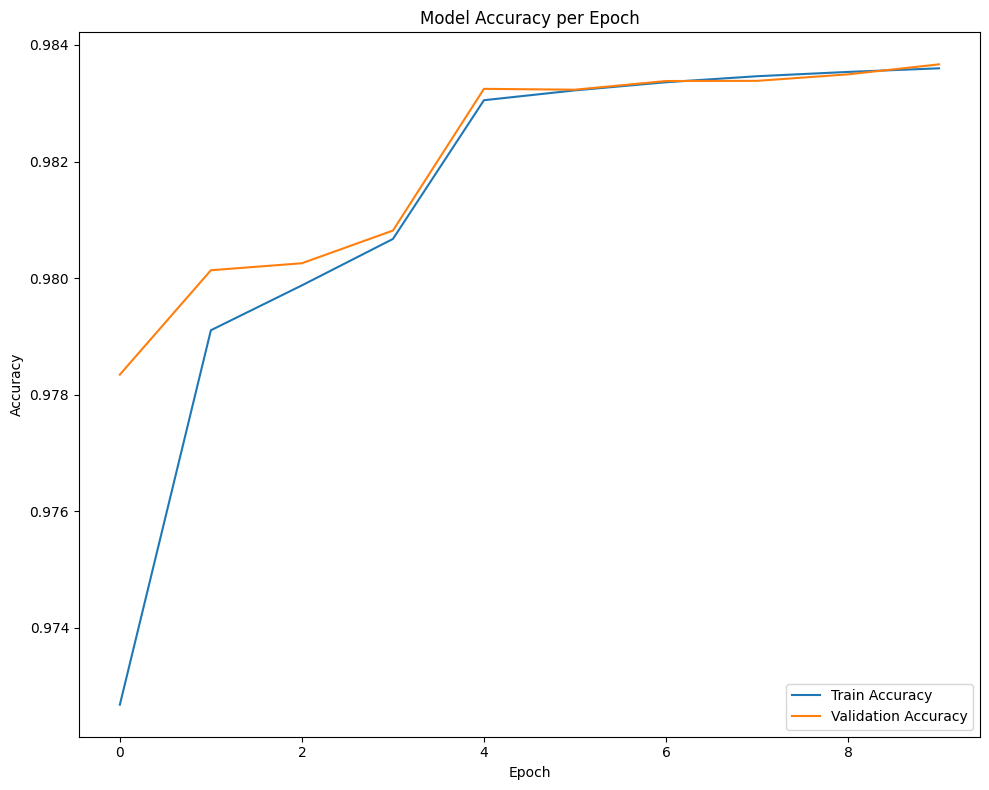

In [ ]:
train_loss = model_history_clf.history["loss"]
val_loss = model_history_clf.history["val_loss"]
train_acc = model_history_clf.history["accuracy"]
val_acc = model_history_clf.history["val_accuracy"]

# Plot 1: Loss per epoch
plt.figure(figsize=(10, 8))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("NN_Classification_loss_plot.pdf")
plt.show()

# Plot 2: Accuracy per epoch
plt.figure(figsize=(10, 8))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("NN_Classification_accuracy_plot.pdf")
plt.show()


In [ ]:
# Prediction (training set)
y_train_clf_pred = model_clf.predict(X_train);
y_train_clf_pred_class = np.argmax(y_train_clf_pred, axis=1)

print("NN Classification report (Training):")
print(classification_report(y_train_clf, y_train_clf_pred_class))

In [ ]:
# Prediction (test set)
y_test_clf_pred = model_clf.predict(X_test);
y_test_clf_pred_class = np.argmax(y_test_clf_pred, axis=1)

print("NN Classification report (Test):")
print(classification_report(y_test_clf, y_test_clf_pred_class))
print(confusion_matrix(y_test_clf, y_test_clf_pred_class))

In [ ]:
# Compute accuracy
score_train = accuracy_score(y_train_clf, y_train_clf_pred_class)
score_test = accuracy_score(y_test_clf, y_test_clf_pred_class)

# Compute f1
train_f1=f1_score(y_train_clf,y_train_clf_pred_class,average="weighted")
test_f1=f1_score(y_test_clf,y_test_clf_pred_class,average="weighted")

In [ ]:
# Adding scores
model_name= "NN Classification"

metrics_compare.append([model_name,"Train","Accuracy",round(score_train,4)])
metrics_compare.append([model_name,"Test","Accuracy",round(score_test,4)])
metrics_compare.append([model_name,"Train","F1",round(train_f1,4)])
metrics_compare.append([model_name,"Test","F1",round(test_f1,4)])

# **Optimization**

# **NN Classification Optimization**

In [ ]:
# create_model for classification
def create_model(hpoptimizer,hplr): #poptimizer):

    x=dense1(inputs)
    #x=dropout(x)
    x=dense2(x)
    #x=dropout(x)
    x=dense3(x)
    #x=dropout(x)
    x=dense4(x)
    outputs=dense5_clf(x)

    if hpoptimizer=='SGD':
        opt=keras.optimizers.SGD(learning_rate=hplr)
    elif hpoptimizer=='RMSprop':
        opt=keras.optimizers.RMSprop(learning_rate=hplr)
    elif hpoptimizer=='Adagrad':
        opt=keras.optimizers.Adagrad(learning_rate=hplr)
    elif hpoptimizer=='Adadelta':
        opt=keras.optimizers.Adadelta(learning_rate=hplr)
    elif hpoptimizer=='Adam':
        opt=keras.optimizers.Adam(learning_rate=hplr)
    elif hpoptimizer=='Adamax':
        opt=keras.optimizers.Adamax(learning_rate=hplr)
    elif hpoptimizer=='Nadam':
        opt=keras.optimizers.Nadam(learning_rate=hplr)


    model=Model(inputs= inputs, outputs = outputs)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

model_keras_clf = KerasClassifier(model=create_model,
                                  epochs=15,
                                  batch_size=8192,
                                  callbacks = [reduce_learning_rate, early_stopping]) #, verbose=0)

In [ ]:
# define of hyperparameters
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batchsizes = [512,256,128]
lrs = [0.01,0.001,0.0001]
parameters = dict(batch_size=batchsizes,model__hpoptimizer=optimizers,model__hplr=lrs)

In [ ]:
# define the GridSearchCV
grid_clf = GridSearchCV(estimator=model_keras_clf, param_grid=parameters,cv=3,verbose=10) #, n_jobs=-1, cv=2)

In [ ]:
# train the GridSearchCV
grid_result = grid_clf.fit(X_train,
                           y_train_clf,
                           validation_data=(X_valid,y_valid_clf))

In [ ]:
train_loss = grid_clf.best_estimator_.history_["loss"]
val_loss = grid_clf.best_estimator_.history_["val_loss"]
train_acc = grid_clf.best_estimator_.history_["accuracy"]
val_acc = grid_clf.best_estimator_.history_["val_accuracy"]

# Plot 1: Loss per epoch
plt.figure(figsize=(10, 8))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("NN_Classification_best_gridcv_loss_plot.pdf")
plt.show()

# Plot 2: Accuracy per epoch
plt.figure(figsize=(10, 8))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("NN_Classification_best_gridcv_accuracy_plot.pdf")
plt.show()

In [ ]:
# Prediction (training set)
y_train_clf_pred = grid_result.predict(X_train);

print("NN Classification report (Training):")
print(classification_report(y_train_clf, y_train_clf_pred))

In [ ]:
# Prediction (test set)
y_test_clf_pred = grid_result.predict(X_test);
#y_test_clf_pred_class = np.argmax(y_test_clf_pred, axis=1)

print("NN Classification report (Test):")
print(classification_report(y_test_clf, y_test_clf_pred))
print(confusion_matrix(y_test_clf, y_test_clf_pred))

In [ ]:
# Compute accuracy
score_train = accuracy_score(y_train_clf, y_train_clf_pred)
score_test = accuracy_score(y_test_clf, y_test_clf_pred)

# Compute f1
train_f1=f1_score(y_train_clf,y_train_clf_pred,average="weighted")
test_f1=f1_score(y_test_clf,y_test_clf_pred,average="weighted")

In [ ]:
# Adding scores
best_param= grid_clf.best_params_
model_name= 'NN Classification optimized(batchsize=%s, optimizer=%s)' % (best_param['batch_size'],best_param['optimizer'])

metrics_compare.append([model_name,"Train","Accuracy",round(score_train,4)])
metrics_compare.append([model_name,"Test","Accuracy",round(score_test,4)])
metrics_compare.append([model_name,"Train","F1",round(train_f1,4)])
metrics_compare.append([model_name,"Test","F1",round(test_f1,4)])

# **NN Regression Optimization**

In [ ]:
# create_model for regression
def create_model_reg(hpoptimizer,hplr):
    x=dense1(inputs)
    x=dense2(x)
    x=dense3(x)
    x=dense4(x)
    outputs=dense5_reg(x)

    if hpoptimizer=='SGD':
        opt=keras.optimizers.SGD(learning_rate=hplr)
    elif hpoptimizer=='RMSprop':
        opt=keras.optimizers.RMSprop(learning_rate=hplr)
    elif hpoptimizer=='Adagrad':
        opt=keras.optimizers.Adagrad(learning_rate=hplr)
    elif hpoptimizer=='Adadelta':
        opt=keras.optimizers.Adadelta(learning_rate=hplr)
    elif hpoptimizer=='Adam':
        opt=keras.optimizers.Adam(learning_rate=hplr)
    elif hpoptimizer=='Adamax':
        opt=keras.optimizers.Adamax(learning_rate=hplr)
    elif hpoptimizer=='Nadam':
        opt=keras.optimizers.Nadam(learning_rate=hplr)


    model=Model(inputs= inputs, outputs = outputs)
    model.compile(loss = 'mse', optimizer = opt, metrics = ['mean_absolute_error'])
    return model

model_keras_reg = KerasRegressor(model=create_model_reg,
                                  epochs=15,
                                  batch_size=8192,
                                  callbacks = [reduce_learning_rate, early_stopping]) #, verbose=0)

In [ ]:
# define of hyperparameters
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batchsizes = [512,256,128]
# learning_rate 0.01 with SGD makes problems on the notebook and you have to reset it, so we leave it out
lrs = [0.001,0.0001]
parameters = dict(batch_size=batchsizes,model__hpoptimizer=optimizers,model__hplr=lrs)

In [ ]:
# define the GridSearchCV
grid_reg = GridSearchCV(estimator=model_keras_reg, param_grid=parameters,cv=3,verbose=10) #, n_jobs=-1)

In [ ]:
# train the GridSearchCV
grid_result = grid_reg.fit(X_train,
                           y_train_reg,
                           validation_data=(X_valid,y_valid_reg))

In [ ]:
train_loss = grid_reg.best_estimator_.history_["loss"]
val_loss = grid_reg.best_estimator_.history_["val_loss"]
train_acc = grid_reg.best_estimator_.history_["mean_absolute_error"]
val_acc = grid_reg.best_estimator_.history_["val_mean_absolute_error"]

# Plot 1: Loss per epoch
plt.figure(figsize=(10, 8))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss per epoch (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig("NN_Regression_best_grid_loss_plot.pdf")
plt.show()

# Plot 2: Accuracy per epoch
plt.figure(figsize=(10, 8))
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy per epoch (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig("NN_Regression_best_gridcv_accuracy_plot.pdf")
plt.show()

In [ ]:
# Predictions
y_train_reg_pred = grid_result.predict(X_train)
y_test_reg_pred = grid_result.predict(X_test)

# Compute R2
score_train=r2_score(y_train_reg,y_train_reg_pred)
score_test=r2_score(y_test_reg,y_test_reg_pred)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_reg,y_train_reg_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_reg,y_test_reg_pred))

In [ ]:
# Adding scores
best_param= grid_reg.best_params_
model_name= model_name='NN Regression optimized(batchsize=%s, optimizer=%s)' % (best_param['batch_size'],best_param['optimizer'])

metrics_compare.append([model_name,"Train","R^2",round(score_train,4)])
metrics_compare.append([model_name,"Test","R^2",round(score_test,4)])
metrics_compare.append([model_name,"Train","RMSE",round(train_rmse,4)])
metrics_compare.append([model_name,"Test","RMSE",round(test_rmse,4)])

# **Interpretation**

In [ ]:
pip install lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the explainer
explainer = LimeTabularExplainer(X_test.values, mode='classification', feature_names=X_test.columns, verbose=True, discretize_continuous=True)

# Define the function to explain
def proba_func(X):
  proba = xgbClf.predict_proba(X)
  return proba

# Choose an instance to explain
instance_index = 3445
instance = X_test.iloc[instance_index].values.reshape(1, -1)

# Explain the instance
explanation = explainer.explain_instance(instance[0], proba_func, num_features=10)

# Show the explanation
explanation.show_in_notebook();



In [ ]:
# local interpretation of neuronal network
import shap

# sample for regression model
explainer = shap.KernelExplainer(model_reg, X_test[0:100])

# explaination for the first 10 instances
shap_values = explainer.shap_values(X_test[0:10])
df_shap_values = pd.DataFrame(shap_values.reshape(10,78), columns=X_test.columns)

# chose an instance (0..9)
idx=0
df_featimp = df_shap_values.sort_values(by=idx,axis=1,key=abs,ascending=True).transpose().rename({idx:'importance'},axis=1) #df_shap_values.sort_values(by="importance")
df_featimp_10 = df_featimp.tail(10)

print("Feature importance (sample for class %d )" % y_clf[idx:idx+1].max())
print(df_featimp_10.iloc[:,idx:idx+1].sort_values(by='importance',key=abs,ascending=False))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.barh(range(len(df_featimp_10)), df_featimp_10['importance'], tick_label=df_featimp_10.index)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title("Feature importance (sample for class %d )" % y_clf[idx:idx+1].max())
fig.tight_layout()
fig.savefig("xgbClf_Feature_importance.pdf")
plt.show();

In [ ]:
#  for comparing results
df_metrics_compare = pd.DataFrame(metrics_compare,columns=["Model","Set","metric","score"])

print("Modeling: Finished")
print("Summery of the statistics:")
print(df_metrics_compare)

df_metrics_compare.to_excel("metrics.xlsx")
